1. EDA and Preprocessing

In [2]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [13]:
train = pd.read_csv("G:/Machine Learning/Codes/Walmart Trip Type Classification/data/train.csv")
test = pd.read_csv("G:/Machine Learning/Codes/Walmart Trip Type Classification/data/test.csv")

In [14]:
print(train.shape)
train.tail()

(647054, 7)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [15]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               647054 non-null  int64  
 1   VisitNumber            647054 non-null  int64  
 2   Weekday                647054 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              647054 non-null  int64  
 5   DepartmentDescription  645693 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


Missing Values

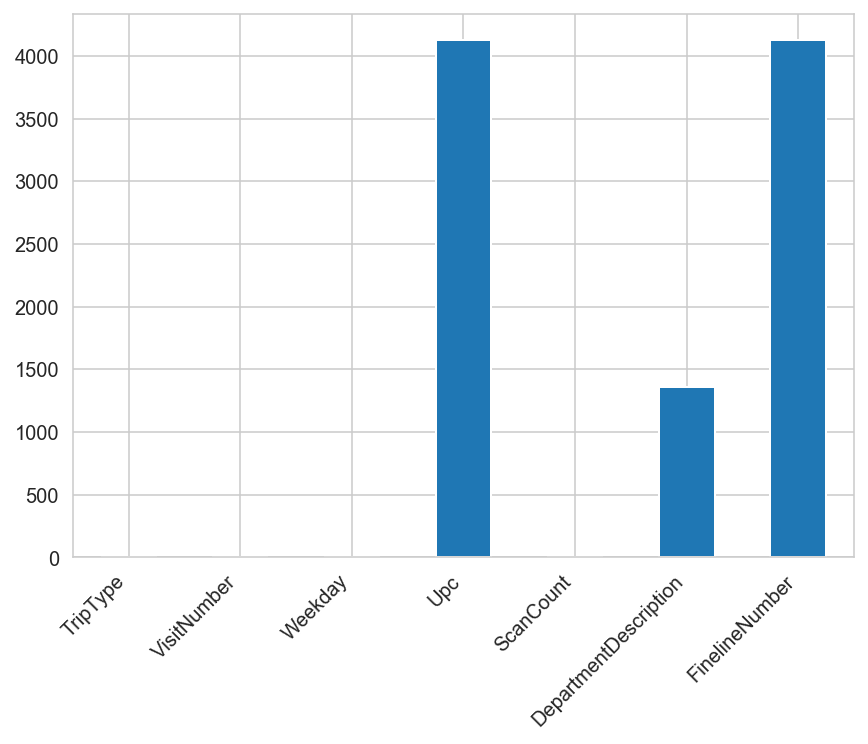

In [16]:

plt.figure(figsize=(7, 5))
train.isnull().sum().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.show()

Encoding Weekday

In [17]:
wd = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, 
      "Friday": 4, "Saturday": 5, "Sunday": 6}
train["Weekday"] = train["Weekday"].apply(lambda x: wd[x])
test["Weekday"] = test["Weekday"].apply(lambda x: wd[x])

In [18]:
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,4,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,4,6.053882e+10,1,SHOES,8931.0
2,30,7,4,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,4,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,4,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Trip Type'),
 Text(0.5, 1.0, 'The Frequent of Trip Type')]

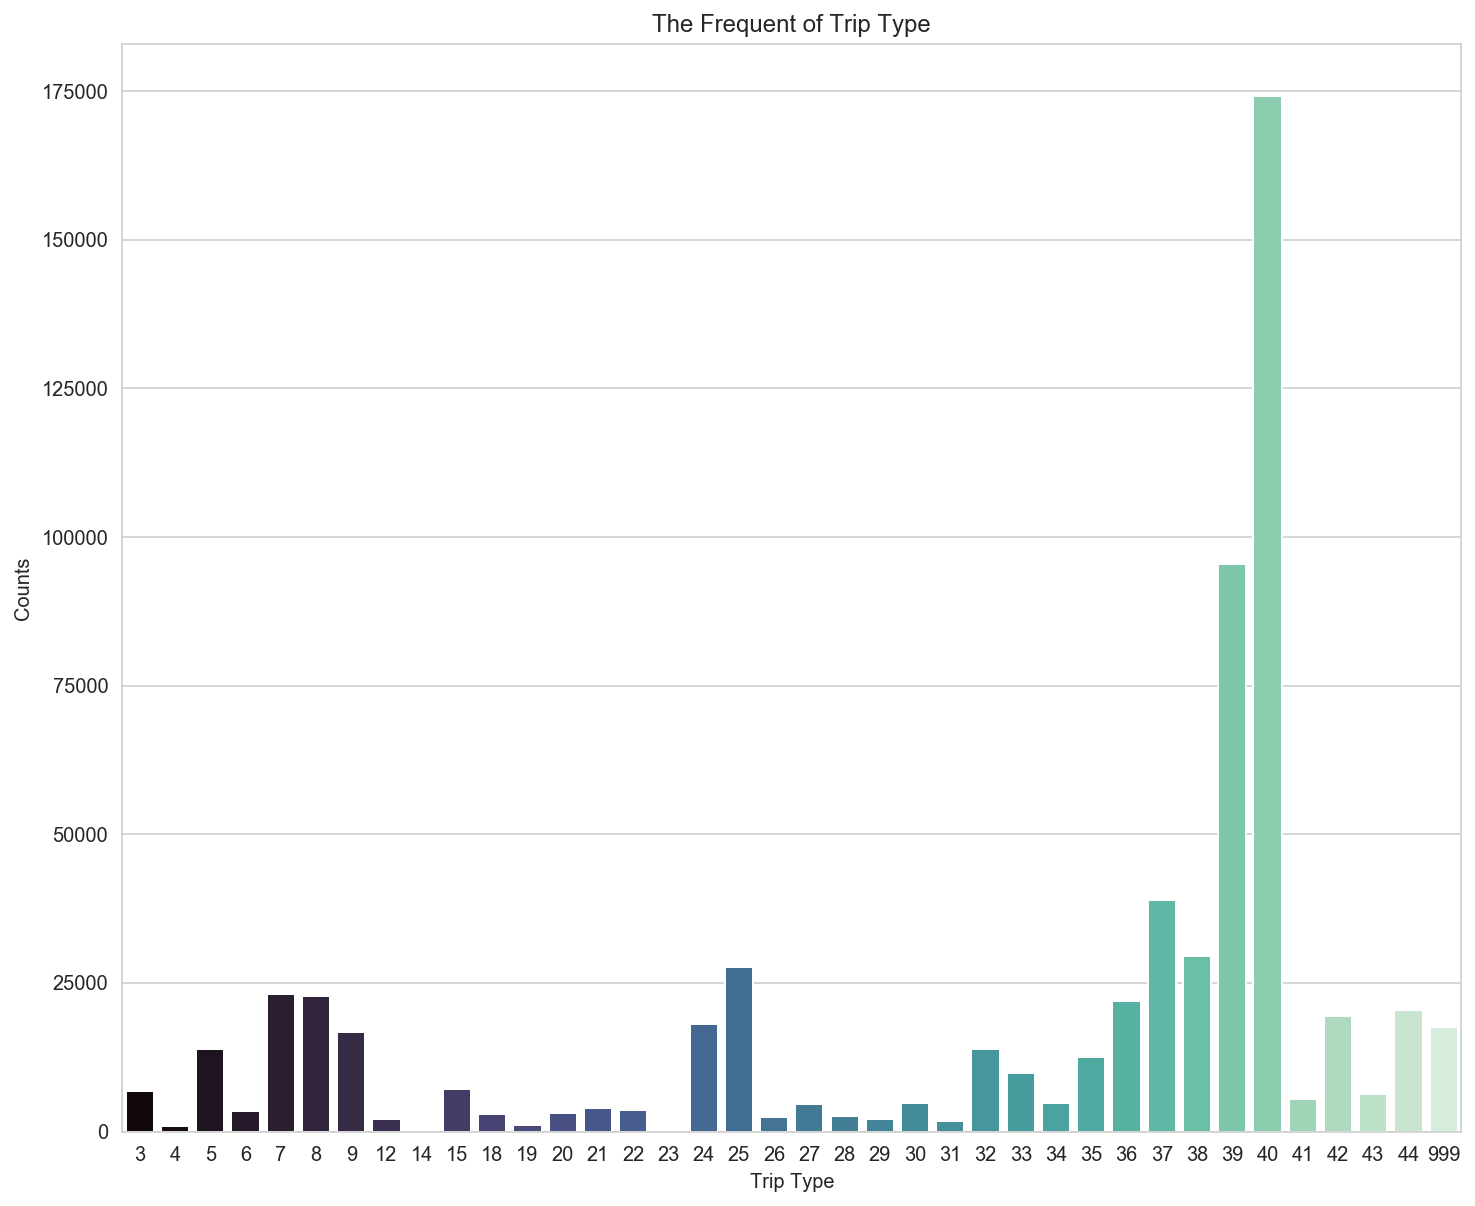

In [19]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax = sns.countplot(x = 'TripType', data = train, palette = 'mako')
ax.set(title = 'The Frequent of Trip Type', ylabel = 'Counts', xlabel = 'Trip Type')

In [21]:
train_dd = pd.get_dummies(train["DepartmentDescription"])
test_dd = pd.get_dummies(test["DepartmentDescription"])

train_dd = pd.concat([train[["VisitNumber"]], train_dd], axis=1)
test_dd = pd.concat([test[["VisitNumber"]], test_dd], axis=1)

train_dd = train_dd.groupby("VisitNumber", as_index=False).sum()
test_dd = test_dd.groupby("VisitNumber", as_index=False).sum()
train_dd.tail()

,VisitNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
95669,191343,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95670,191344,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95671,191345,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95672,191346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95673,191347,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train = train.merge(train_dd, on=["VisitNumber"])

In [23]:
#remove null and infinite values
train.replace(np.inf, 0, inplace=True)
train.fillna(value=0, inplace=True)

test.replace(np.inf, 0, inplace=True)
test.fillna(value=0, inplace=True)
train.drop("DepartmentDescription", axis=1, inplace=True)
test.drop("DepartmentDescription", axis=1, inplace=True)
train.drop("VisitNumber", axis=1, inplace=True)
test.drop("VisitNumber", axis=1, inplace=True)

In [24]:
train.head()

,TripType,Weekday,Upc,ScanCount,FinelineNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,999,4,6.811315e+10,-1,1000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,4,6.053882e+10,1,8931.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30,4,7.410811e+09,1,4504.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,26,4,2.238404e+09,2,3565.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,4,2.006614e+09,2,1017.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
train.loc[train["ScanCount"] < 0, "Return"] = 1
train.loc[train["Return"] != 1, "Return"] = 0

test.loc[test["ScanCount"] < 0, "Return"] = 1
test.loc[test["Return"] != 1, "Return"] = 0

train["Pos_Sum"] = train["ScanCount"]
test["Pos_Sum"] = test["ScanCount"]

train.loc[train["Pos_Sum"] < 0, "Pos_Sum"] = 0
test.loc[test["Pos_Sum"] < 0, "Pos_Sum"] = 0

train["Neg_Sum"] = train["ScanCount"]
test["Neg_Sum"] = test["ScanCount"]

train.loc[train["Neg_Sum"] > 0, "Neg_Sum"] = 0
test.loc[test["Neg_Sum"] > 0, "Neg_Sum"] = 0

In [27]:
train.drop("ScanCount", axis=1, inplace=True)
test.drop("ScanCount", axis=1, inplace=True)
train.drop("Upc", axis=1, inplace=True)
test.drop("Upc", axis=1, inplace=True)
train.drop("FinelineNumber", axis=1, inplace=True)
test.drop("FinelineNumber", axis=1, inplace=True)

In [30]:
train.head()

,TripType,Weekday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,...,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,Return,Pos_Sum,Neg_Sum
0,999,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,-1
1,30,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.0,1,0
2,30,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.0,1,0
3,26,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,2,0
4,26,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,2,0


In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
#Initializing the Artificial Neural Network
classifier = Sequential()

In [ ]:
#Adding the input layer and a hidden layer
classifier.add(Dense(output_dim = 5, init = ‘uniform’, activation = ‘relu’,
input_dim = 73))
classifier.add(Dense(output_dim = 5, init = ‘uniform’, activation = ‘relu’))
classifier.add(Dense(output_dim = 5, init = ‘uniform’, activation = ‘relu’))
classifier.add(Dense(output_dim = 38, init = ‘uniform’, activation = ‘softmax’))

In [ ]:
#Compiling the artificial neural network
classifier.compile(optimizer = ‘adam’, loss = ‘binary_crossentropy’,
metrics = [‘accuracy’])


In [ ]:
#Fitting artifical neural network to the training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:10]

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()       